<font face="Arial" size="4" color="black">
    
# Bipartite Entangled States Preparation Theory, with QuTiP examples
Author: Anastasiya Khromova (anastasiya.khromova17@gmail.com), 2025
</font>

<font face="Arial" size="4" color="black">
    
To prepare a Bell state, you need to start with two qubits in the |0⟩ state and apply a combination of quantum gates. To prepare the ∣ψ+⟩, you need:
Initialize two qubits in the |0⟩ state (the initial product state, i.e. |0⟩⊗|0⟩, or |00⟩)

2. Apply a Hadamard gate (H) to the first qubit (qubit 1, the control qubit), setting it in a superposition state: H∣0⟩=1/√2(|0⟩+|1⟩)
3. Apply a Controlled-NOT (CNOT) gate with the first qubit (qubit 1) as the control and the second qubit (qubit 2) as the target. If qubit 1 is in the |0⟩ state, do nothing to qubit 2; if qubit 1 is in the |1⟩ state, apply an X (NOT) gate to qubit 2. In that case, we obtaine the entangled state |ψ+⟩=(|00⟩+ |11⟩)/√2 
4. Measure both qubits

We import the necessary libraries: NumPy, Matplotlib, and QuTiP (Quantum Toolbox in Python):
</font>

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import * #Qutip is a Python library for simulating quantum systems.
from qutip_qip.circuit import QubitCircuit
from qutip_qip.operations import *  # Import gate operations
from qutip import tensor
from qutip.measurement import measure, measurement_statistics

<font face="Arial" size="4" color="black">

We create a QubitCircuit object called qc with 2 qubits (N=2) and 2 classical bits (num_cbits=2). We define the initial state of the circuit as the tensor product of two qubits in the |0⟩ state using tensor([basis(2, 0) for _ in range(qc.N)]). The basis(2, 0) function creates a quantum state vector for a 2-level system (qubit) in the |0⟩ state. To create a Bell state, we add a Hadamard gate (H) to qubit 0 using qc.add_gate("H", 0) and a CNOT gate with qubit 0 as the control and qubit 1 as the target, using qc.add_gate("CNOT", 1, 0). We simulate the circuit using qc.run(state=initial_state) and store the result in the result variable. We assign the final state of the simulation to the variable Bell_State and print it using print("Bell State:", Bell_State). We add two measurement operations to the circuit using qc.add_measurement().  The first measurement is performed on qubit 0 and stores the result in  classical bit 0. The second measurement is performed on qubit 1 and  stores the result in classical bit 1. Finally, you use qc.draw("matplotlib") to visualize the quantum circuit using Matplotlib.

In QuTiP, the qubits are labeled in reverse order compared to some other quantum computing frameworks. The convention used in QuTiP is that the qubit with index 0 is at the bottom of the circuit diagram, and the qubit indices increase from bottom to top.

</font>

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]
Bell State: Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]


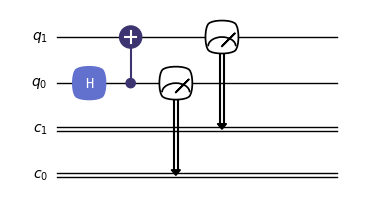

In [42]:
# Create a circuit with 3 qubits and 2 classical bits
qc = QubitCircuit(N=2, num_cbits=2)

# Initial state: all qubits in |0⟩ state
initial_state = tensor([basis(2, 0) for _ in range(qc.N)])
print(initial_state)

qc.add_gate ( "H", 0 )
qc.add_gate ( "CNOT", 1, 0 )

# Simulate the circuit
result = qc.run(state=initial_state)

# Get the final state
Bell_State = result

print("Bell State:", Bell_State)

qc.add_measurement("M", targets=[0], classical_store=0)
qc.add_measurement("M", targets=[1], classical_store=1)

fig, ax = plt.subplots(figsize=(4, 2))  # Adjust the figure size as needed
qc.draw("matplotlib", ax=ax)
#fig.savefig('Bell_state_circuit.png', dpi=300, bbox_inches='tight')

<font face="Arial" size="4" color="black">

The circuit we have created prepares a Bell state, specifically the state (|00⟩ + |11⟩) / √2.

The four Bell states and their corresponding measurement outcomes:

-    Bell State 1: (|00⟩ + |11⟩) / √2; Measurement Outcomes: "00" and "11" with equal probability (50% each)
-    Bell State 2: (|00⟩ - |11⟩) / √2; Measurement Outcomes: "00" and "11" with equal probability (50% each)
-    Bell State 3: (|01⟩ + |10⟩) / √2; Measurement Outcomes: "01" and "10" with equal probability (50% each)
-    Bell State 4: (|01⟩ - |10⟩) / √2; Measurement Outcomes: "01" and "10" with equal probability (50% each)

To prepare each Bell state, you can modify the quantum circuit accordingly:

-    Bell State 1: (|00⟩ + |11⟩) / √2; qc.add_gate("H", 0) qc.add_gate("CNOT", 1, 0)
-    Bell State 2: (|00⟩ - |11⟩) / √2; qc.add_gate("H", 0) qc.add_gate("CNOT", 1, 0) qc.add_gate("Z", 0)
-    Bell State 3: (|01⟩ + |10⟩) / √2; qc.add_gate("H", 0) qc.add_gate("CNOT", 1, 0) qc.add_gate("X", 0)
-    Bell State 4: (|01⟩ - |10⟩) / √2; qc.add_gate("H", 0) qc.add_gate("CNOT", 1, 0) qc.add_gate("X", 0) qc.add_gate("Z", 0)

In each case, the initial state should be set to |00⟩ using initial_state = tensor([basis(2, 0) for _ in range(qc.N)]). After simulating the circuit and collecting the measurement results, you will observe the corresponding measurement outcomes for each Bell state with approximately equal probabilities.

</font>

<font face="Arial" size="4" color="black">

These additional gates modify the relative phases of the states in the superposition, resulting in the different Bell states. Thereafter, we define the projection operators for measuring the first and second qubits in the computational basis (|0⟩ and |1⟩).

1. PZ1 represents the projection operators for measuring the first qubit:

       - tensor(ket2dm(basis(2, 0)), identity(2)) creates the  projection operator |0⟩⟨0| ⊗ I, which projects the first qubit onto the  |0⟩ state and leaves the second qubit unchanged.
       - tensor(ket2dm(basis(2, 1)), identity(2)) creates the  projection operator |1⟩⟨1| ⊗ I, which projects the first qubit onto the  |1⟩ state and leaves the second qubit unchanged.

2. PZ2 represents the projection operators for measuring the second qubit:

   
       - tensor(identity(2), ket2dm(basis(2, 0))) creates the  projection operator I ⊗ |0⟩⟨0|, which leaves the first qubit unchanged  and projects the second qubit onto the |0⟩ state.
       - tensor(identity(2), ket2dm(basis(2, 1))) creates the  projection operator I ⊗ |1⟩⟨1|, which leaves the first qubit unchanged  and projects the second qubit onto the |1⟩ state.

The ket2dm(basis(2, 0)) and ket2dm(basis(2, 1)) functions create the density matrices for the |0⟩ and |1⟩ states, respectively. The identity(2) function creates a 2x2 identity matrix, which represents leaving a qubit unchanged.
These projection operators are used later in the code to measure the qubits and obtain the measurement outcomes. The measure() function takes the quantum state (result) and the projection operators (PZ1 or PZ2) as input and returns the measurement outcome for the corresponding qubit.

</font>

Measurement outcome probabilities:
|00>: 0.5120
|01>: 0.0000
|10>: 0.0000
|11>: 0.4880


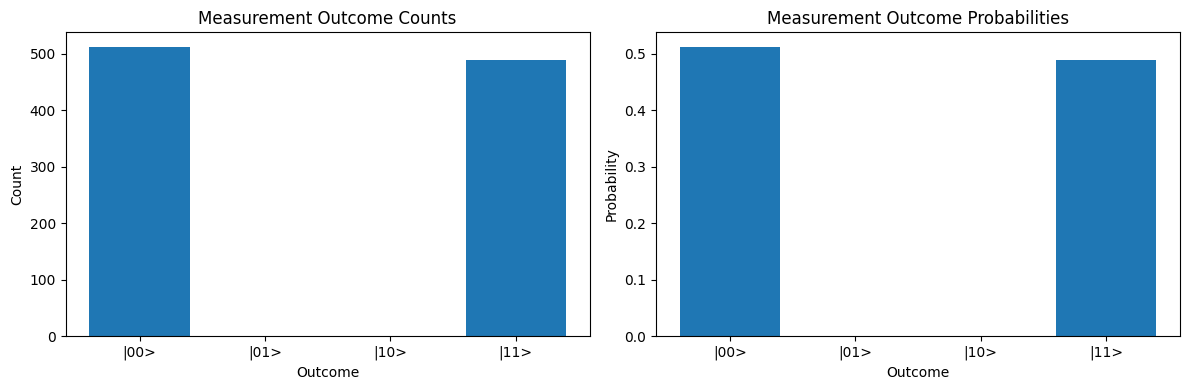

In [43]:
# Define the projection operators for the computational basis
PZ1 = [tensor(ket2dm(basis(2, 0)), identity(2)), tensor(ket2dm(basis(2, 1)), identity(2))]
PZ2 = [tensor(identity(2), ket2dm(basis(2, 0))), tensor(identity(2), ket2dm(basis(2, 1)))]


# Number of times to run the circuit
num_runs = 1000

# Run the circuit multiple times and collect the measurement outcomes
measurement_results = []
for _ in range(num_runs):
    # Run the circuit
    result = qc.run(initial_state)
    
    # Measure the first qubit
    measurement1, _ = measure(result, PZ1)
    
    # Measure the second qubit
    measurement2, _ = measure(result, PZ2)
    
    # Combine the measurement outcomes
    outcome = f"|{measurement1}{measurement2}>"
    measurement_results.append(outcome)

# Count the occurrences of |00>, |01>, |10>, and |11> outcomes
outcome_counts = {'|00>': 0, '|01>': 0, '|10>': 0, '|11>': 0}
for outcome in measurement_results:
    outcome_counts[outcome] += 1

# Calculate the probabilities of |00>, |01>, |10>, and |11> outcomes
total_runs = len(measurement_results)
probabilities = {outcome: count / total_runs for outcome, count in outcome_counts.items()}

# Print the probabilities
print("Measurement outcome probabilities:")
for outcome, probability in probabilities.items():
    print(f"{outcome}: {probability:.4f}")

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the count histogram
ax1.bar(outcome_counts.keys(), outcome_counts.values())
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Count')
ax1.set_title('Measurement Outcome Counts')

# Plot the probability histogram
ax2.bar(outcome_counts.keys(), probabilities.values())
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Measurement Outcome Probabilities')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure as PNG
plt.savefig('bell_state_histograms.png', dpi=300)

# Display the plot
plt.show()

<font face="Arial" size="4" color="black">

# Two-Qubit Entangled State Preparation in Trapped Ions, with QuTiP examples

In the case of laser light/RF radiation interacting with a two-level system, such as an atom or trapped ion with a ground state and an excited state, this leads to a periodic exchange of energy between the light (RF) field and the two-level system. You would observe the oscillations (continuous changes of quantum-mechanical amplitudes, not discrete) called Rabi oscillations.
The ion trapped in a linear Paul trap with a magnetic field gradient [1] and interacting with the electromagnetic field is described by the Hamiltonian:

<div align="center">
    <img src="images/hamiltonian_trapped_ions_mw.png">
</div>

where

<div align="center">
    <img src="images/interaction_hamiltonian.png">
</div>

The part H₀ of the total Hamiltonian describes the internal state of the ion with the transition frequency ω. The second part

<div align="center">
    <img src="images/Hosc.png">
</div>

is the quantum harmonic oscillator Hamiltonian written in terms of the corresponding harmonic raising and lowering operators, a⁺ and a, and the oscillation frequency:

<div align="center">
    <img src="images/trap_freq.png">
</div>

The third part

<div align="center">
    <img src="images/Hint.png">
</div>

describes the interaction of the ion with the electromagnetic field of frequency

<div align="center">
    <img src="images/atom_freq.png">
</div>

The wave-vector k, and the phase φ. The raising and lowering operators of the ion's internal state

<div align="center">
    <img src="images/raising_lowering_oper.png">
</div>

where σₓ, σy, and σz are the three standard Pauli matrices.
The Rabi frequency is

<div align="center">
    <img src="images/Rabifrequency.png">
</div>

where μ is the magnetic dipole momentum and B field, is the measure of how strongly the internal state of the ion is coupled to the electromagnetic radiation.

After we perform the transformation into the interaction picture, apply the rotating-wave approximation, and enter the Lamb-Dicke regime, we observe three distinct processes.

1. When the resonance conditions are fulfilled and Δ=0, the interaction Hamiltonian in the equation above reduces to:

<div align="center">
    <img src="images/hamiltonoan_carrier_transition.png">
</div>

and corresponds to excitation on the carrier qubit transition. The carrier transition is a direct transition between two internal states of the ion without changing its motional state. Here,

<div align="center">
    <img src="images/Rabi_carrier transition.png">
</div>

where

<div align="center">
    <img src="images/nu_eff.png">
</div>

is an effective Lamb-Dicke parameter. The Lamb-Dicke parameter shows how strongly the internal state of the ion is coupled to the COM mode of the ion string. The center-of-mass (COM) mode refers to the collective motion of a string of ions confined in an ion trap.

>When multiple ions are trapped in a linear ion trap, they arrange themselves in a string-like configuration due to their mutual Coulomb repulsion and the trapping potential. The ions can undergo collective vibrations or normal modes of motion. The lowest-frequency mode is called the center-of-mass mode (COM), where all the ions oscillate in phase with the same amplitude.

The Lamb-Dicke parameter (η) is a dimensionless quantity that characterizes the strength of the coupling between the internal states of the ions and their external motion, specifically the center-of-mass mode. It is defined as the ratio of the characteristic length scale of the ion's internal state (e.g., the wavelength of the transition) to the characteristic length scale of the external motion (e.g., the size of the ion wave packet).
A small Lamb-Dicke parameter (η ≪ 1) indicates that the coupling between the internal states and the COM mode is weak. In this regime, the ion's internal state is only slightly affected by the motion, and the system is said to be in the Lamb-Dicke regime. This regime is desirable for many quantum computing and quantum information processing applications because it allows for precise control and manipulation of the ions' internal states while minimizing the impact of the ions' motion.

2. When the detuning is equal to the trap frequency:

<div align="center">
    <img src="images/detuning_2.png">
</div>

The phonon number decreases by one for absorption, and  the equation above can be approximated by a Hamiltonian of the Jaynes-Cummings type as:

<div align="center">
    <img src="images/Hamiltonian of the Jaynes-Cummings type.png">
</div>

where the coupling strength on the red sideband is:

<div align="center">
    <img src="images/red_sideband.png">
</div>

The red sideband transition involves a change in both the internal state and the motional state of the ion. It occurs when the frequency of the applied laser is detuned from the carrier transition by an amount equal to the motional frequency of the ion. During a red sideband transition, the ion's internal state changes, and simultaneously, a phonon is removed from the motional mode. This process is also known as "stimulated emission of phonons."

3. When the detuning is equal to the minus trap frequency:

<div align="center">
    <img src="images/detuning_1.png">
</div>

The phonon number increases by one absorption, and the corresponding interaction Hamiltonian can be approximated by the anti-Jaynes-Cummings Hamiltonian:

<div align="center">
    <img src="images/anti-Jaynes-Cummings Hamiltonian.png">
</div>

where the coupling strength on the blue sideband is:

<div align="center">
    <img src="images/blue_sideband.png">
</div>

The blue sideband transition is similar to the red sideband transition, but instead of removing a phonon, it involves the creation of a phonon in the ion's motional mode. The blue sideband transition occurs when the frequency of the applied laser is detuned from the carrier transition by an amount equal to the motional frequency of the ion, but in the opposite direction compared to the red sideband. During a blue sideband transition, the ion's internal state changes, and simultaneously, a phonon is added to the motional mode. This process is also known as "stimulated absorption of phonons."

In the current experiment, the manipulations of the single qubit were performed on the ion's carrier transition. It is possible to prepare the qubit in any state by allowing it to interact with a field of particular direction and strength for a certain time t, i.e., by applying a pulse of duration t to a certain ion i. The action of such a carrier pulse is described by a unitary operator as:

<div align="center">
    <img src="images/rotation_y.png">
</div>

where j is the number of the ion. The rotation angle about the rotation axis defined in the x-y plane by ϕ:

<div align="center">
    <img src="images/rot_angle.png">
</div>

>In the case of a π-pulse, θ = π, and the qubit state evolves through half a Rabi oscillation period. In the case of a π/2 pulse, θ = π/2, and the qubit state evolves through the quarter of a Rabi oscillation period. If the qubit is in the initial state |0⟩ and we would like to prepare it in |1⟩, the rotation around the x-axis (y-axis) by θ = π will prepare the state in the |1⟩ (-i|1⟩). If the qubit state needs to be prepared in the superposition state, the spin rotation around the x-axis (y-axis) by a θ = π/2 angle is performed. This is the same as to act on the |0⟩ (|1⟩) state with the Hadamard gate.

How do we do that in QuTip? We will work with two ions since we need a CNOT later. The code defines a rotation gate for a system of two ions in a trapped-ion quantum computer. These lines define the parameters for the system, including the Rabi frequency (Omega), detuning (Delta), trap frequency (wc), and the number of ions (num_ions). Then we define the basis states for a single ion, where g represents the ground state and e represents the excited state. Then we define the operators used in the system: s_low represents the sigma minus operator, which transitions an ion from the excited state to the ground state; s_high represents the sigma plus operator, which transitions an ion from the ground state to the excited state; sz represents the sigma_z operator, which measures the population difference between the excited and ground states. The initial state of the system, where both ions are in the ground state, is defined by psi0 = tensor(basis(N, 0), g, g) . The tensor function is used to create a composite state of the motional mode (represented by basis(N, 0)) and the internal states of the two ions (both in the ground state g). The def rotation_gate(phi, t) function defines the rotation gate, which applies a rotation to the ion's internal state. The Hamiltonian H_I represents the interaction between the ion and the laser/RF field, with Omega being the Rabi frequency, phi being the phase of the laser/RF field, and s_high and s_low being the raising and lowering operators, respectively. The exponential (-1j * H_I * t).expm() calculates the matrix exponential of -i * H_I * t, which represents the unitary evolution of the system under the Hamiltonian H_I for a time t.


###  References

[1] Anastasiya Khromova, Quantum gates with trapped ions using magnetic gradient induced coupling, PhD Thesis 2012, https://dspace.ub.uni-siegen.de/entities/publication/cd2a16e9-ba44-4610-bd17-4066af655b7e

</font>

In [44]:
# Define parameters
Omega = 1  # Rabi frequency
Delta = 0.1  # Detuning
wc = 1.0  # Trap frequency
N = 10  # Dimension of the Hilbert space for the motional mode
num_ions = 2  # Number of ions

# Define basis states
g = basis(2, 0)  # Ground state |g>
e = basis(2, 1)  # Excited state |e>

# Define operators
s_low = g * e.dag()  # sigma minus
s_high = e * g.dag()  # sigma plus

sz = e * e.dag() - g * g.dag()  # sigma_z operator

# Define the initial state (both ions in the ground state)
psi0 = tensor(basis(N, 0), g, g)

# Rotation gate
def rotation_gate(phi, t):
    H_I = Omega / 2 * (s_high * np.exp(1j * phi) + s_low * np.exp(-1j * phi))
    return (-1j * H_I * t).expm()

<font face="Arial" size="4" color="black">

Let's now define different rotation gates for different rotation angles θ and ϕ. A rotation gate for a π/2 pulse around the +y-axis. The phase phi_pi_2_pos is set to π/2, and the time t_pi_2 is calculated based on the Rabi frequency Omega. The rotation_gate function is called with these parameters to create the rotation gate rotation_gate_pi_2_pos_y.

</font>

In [45]:
# Define the rotation gate for a π/2 pulse around the +y-axis
phi_pi_2_pos = np.pi / 2
t_pi_2 = np.pi / (2 * Omega)
rotation_gate_pi_2_pos_y = rotation_gate(phi_pi_2_pos, t_pi_2)

<font face="Arial" size="4" color="black">

Similarly, we define a rotation gate for a π pulse around the +y-axis. The phase phi_pi_pos is set to π/2, and the time t_pi is calculated based on the Rabi frequency Omega. The rotation_gate function is called to create the rotation gate rotation_gate_pi_pos_y.

</font>

In [46]:
# Define the rotation gate for a π pulse around the +y-axis
phi_pi_pos = np.pi / 2
t_pi = np.pi / Omega
rotation_gate_pi_pos_y = rotation_gate(phi_pi_pos, t_pi)

<font face="Arial" size="4" color="black">

To define a rotation gate for a π/2 pulse around the -y-axis, the phase phi_pi_2_neg is set to -π/2, and the time t_pi_2 is used. The rotation_gate function is called to create the rotation gate rotation_gate_pi_2_neg_y. Then we apply the π/2 pulse rotation gate to ion 1 in the system. The tensor function is used to create a composite operator that applies the rotation gate rotation_gate_pi_2_pos_y to ion 1 while leaving the other ion unaffected (using qeye(2)). The initial state psi0 is then multiplied by this composite operator to obtain the rotated state rotated_state1.

</font>

In [47]:
# Define the rotation gate for a π/2 pulse around the -y-axis
phi_pi_2_neg = -np.pi / 2
rotation_gate_pi_2_neg_y = rotation_gate(phi_pi_2_neg, t_pi_2)

# Apply a π/2 pulse on ion 1 around the +y-axis
rotated_state1 = tensor(qeye(N), rotation_gate_pi_2_pos_y, qeye(2)) * psi0

<font face="Arial" size="4" color="black">
To create a visualization of the rotation of a quantum state on the Bloch sphere and save it as an animated GIF file, see the explanation in the Jupyter Notebook in a GitHub repository here. The result of the rotated_state1 is presented in the animation below.

1. For creating the figure and axes we use pyplot.figure() and add a 3D subplot to it using fig.add_subplot(). The azim and elev parameters set the initial azimuthal and elevation angles for the 3D view of the Bloch sphere. The projection="3d" parameter specifies that the subplot should be a 3D plot. The Bloch class from QuTiP is used to create a Bloch sphere object, which will be used to visualize the quantum states.
2. The animate function is called repeatedly by the animation framework to update the visualization for each frame. The parameter i represents the frame number. If i is 0, the function clears the Bloch sphere and adds the initial state psi0 to the visualization using sphere.add_states(psi0.ptrace(1)). The ptrace(1) function is used to extract the state of the first qubit from the composite system. If i is 1, the function clears the Bloch sphere and adds the rotated state rotated_state1 to the visualization using sphere.add_states(rotated_state1.ptrace(1)). Finally, sphere.render() is called to render the updated Bloch sphere, and the function returns the ax object.
3. The animation.FuncAnimation function is used to create an animation object ani. The fig parameter specifies the figure to which the animation will be added. The animate parameter specifies the update function that will be called for each frame. The frames parameter sets the number of frames in the animation. In this case, there are 2 frames. The interval parameter sets the time interval between frames in milliseconds. Here, it is set to 1000 ms (1 second). The blit=False parameter indicates that the entire figure should be redrawn for each frame. The repeat=True parameter specifies that the animation should repeat indefinitely. Saving the animation as a GIF file is a final step.

</font>

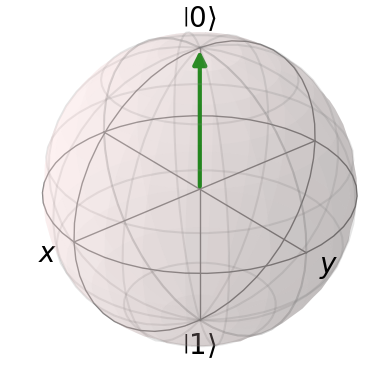

In [48]:
from matplotlib import pyplot, animation
from IPython.display import HTML

# Create a figure and axes for the Bloch sphere
fig = pyplot.figure()
ax = fig.add_subplot(azim=-40, elev=30, projection="3d")
sphere = Bloch(axes=ax)

# Define the animation update function
def animate(i):
    if i == 0:
        sphere.clear()
        sphere.add_states(psi0.ptrace(1))
    elif i == 1:
        sphere.clear()
        sphere.add_states(rotated_state1.ptrace(1))
    sphere.render()
    return ax

ani = animation.FuncAnimation(fig, animate, frames=2, interval=1000, blit=False, repeat=True)

# Display the animation in the notebook using the JavaScript writer
HTML(ani.to_jshtml())

# Save the animation as a GIF file
#ani.save('bloch_sphere_rotation.gif', writer='pillow', fps=2)

<font face="Arial" size="4" color="black">

Let's do the spin echo sequence on two ions to check for the coupling between the ions, which we need to perform the CNOT gate to create an entanglement. For two ions (or a chain of ions), the interaction Hamiltonian will have a different shape:

<div align="center">
    <img src="images/int_hamiltonian.png">
</div>

where N is the number of ions in the chain and

<div align="center">
    <img src="images/coupling_constant.png">
</div>

is the generalized expression for the spin-spin coupling constants between different ions i and j.

</font>

In [49]:
def free_evolution(t):
    H_I = 1/2 * J * tensor(sz, sz)
    return (-1j * H_I * t).expm()

<font face="Arial" size="4" color="black">

The pulse sequence that will be realized in the code is a basic building block for creating entanglement between two ions in a trapped-ion quantum computer. The sequence consists of applying specific laser/RF pulses to manipulate the internal states of the ions, interspersed with periods of free evolution where the ions interact via their collective motional modes. Here's a step-by-step explanation of the sequence: 

1. Both ions are initialized in their ground state
2. A laser/RF pulse is applied to the first ion, rotating the ion's state around the +y-axis by π/2 radians. This is achieved by applying the rotation_gate_pi_2_pos_y to the first ion.
3. The first free evolution is applied. The system is allowed to evolve freely for a time tau, during which the ions interact through their collective motional mode, which leads to entanglement. This is represented by applying the free_evolution(tau) operation.
4. Another laser/RF pulse is applied to the first ion, this time with a duration that causes a rotation of π radians around the +y-axis implemented by rotation_gate_pi_pos_y. This operation can be used to refocus the evolution of the system, effectively mitigating the effects of certain types of errors or unwanted interactions.
5. The second free evolution. The system undergoes another period of free evolution for a time tau, further allowing the ions to interact and become entangled. final_state2 = tensor(qeye(N), free_evolution(tau)) * rotated_state2
6. Finally, a π/2 pulse is applied to the first ion, but this time with a phase of -π/2, rotating the ion's state around the -y-axis, implemented by rotation_gate_pi_2_neg_y. This pulse, in combination with the previous operations, can be part of a larger sequence designed to generate specific entangled states or implement quantum gates.

</font>

In [50]:
# Define the coupling constant
J = 0.5

# Define tau
t_evolution = 2e-3  # Evolution time (2 milliseconds)
scaling_factor = 500  # Scaling factor based on experimental values
tau = t_evolution / 2 * scaling_factor

# Define basis states
g = basis(2, 0)  # Ground state |g>
e = basis(2, 1)  # Excited state |e>

# Define operators
s_low = g * e.dag()  # sigma minus
s_high = e * g.dag()  # sigma plus

#sz = g * g.dag()  # Projection operator |g><g|
sz = e * e.dag() - g * g.dag()  # sigma_z operator

# Define the initial state (both ions in the ground state)
psi0 = tensor(basis(N, 0), g, g)

# Define the rotation gate for a π/2 pulse around the +y-axis
phi_pi_2_pos = np.pi / 2
t_pi_2 = np.pi / (2 * Omega)
rotation_gate_pi_2_pos_y = rotation_gate(phi_pi_2_pos, t_pi_2)

# Define the rotation gate for a π pulse around the +y-axis
phi_pi_pos = np.pi / 2
t_pi = np.pi / Omega
rotation_gate_pi_pos_y = rotation_gate(phi_pi_pos, t_pi)

# Define the rotation gate for a π/2 pulse around the -y-axis
phi_pi_2_neg = -np.pi / 2
rotation_gate_pi_2_neg_y = rotation_gate(phi_pi_2_neg, t_pi_2)

# Apply a π/2 pulse on ion 1 around the +y-axis
rotated_state1 = tensor(qeye(N), rotation_gate_pi_2_pos_y, qeye(2)) * psi0

# Apply free evolution during time tau
tau = t_evolution / 2 * scaling_factor
final_state1 = tensor(qeye(N), free_evolution(tau)) * rotated_state1

# Apply a π pulse on the first ion around the +y-axis
rotated_state2 = tensor(qeye(N), rotation_gate_pi_pos_y, qeye(2)) * final_state1

# Apply the second free evolution during time tau
final_state2 = tensor(qeye(N), free_evolution(tau)) * rotated_state2

# Apply a π/2 pulse on ion 1 around the -y-axis
rotated_state3 = tensor(qeye(N), rotation_gate_pi_2_neg_y, qeye(2)) * final_state2


<font face="Arial" size="4" color="black">

The result of the spin evolution from  psi0 to rotated_state3 is presented in the animation below.

</font>

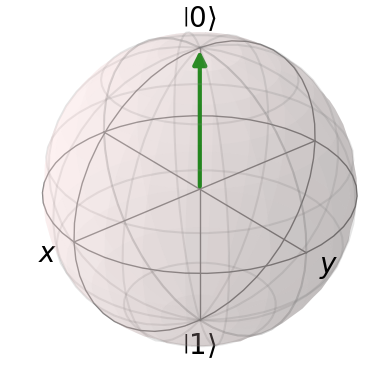

In [51]:
# Create a figure and axes for the Bloch sphere
fig = pyplot.figure()
ax = fig.add_subplot(azim=-40, elev=30, projection="3d")
sphere = Bloch(axes=ax)

# Define the animation update function
def animate(i):
    if i == 0:
        sphere.clear()
        sphere.add_states(psi0.ptrace(1))
    elif i == 1:
        sphere.clear()
        sphere.add_states(rotated_state1.ptrace(1))
    elif i == 2:
        sphere.clear()
        sphere.add_states(final_state1.ptrace(1))
    elif i == 3:
        sphere.clear()
        sphere.add_states(rotated_state2.ptrace(1))
    elif i == 4:
        sphere.clear()
        sphere.add_states(final_state2.ptrace(1))
    elif i == 5:
        sphere.clear()
        sphere.add_states(rotated_state3.ptrace(1))
    sphere.render()
    return ax

ani = animation.FuncAnimation(fig, animate, frames=6, interval=1000, blit=False, repeat=True)

# Display the animation in the notebook using the JavaScript writer
HTML(ani.to_jshtml())

# Save the animation as a GIF file
#ani.save('bloch_sphere_spin_echo_pi.gif', writer='pillow', fps=2)

<font face="Arial" size="4" color="black">

Now let's add the π-pulses on the second ion to create an entanglement. A π pulse is applied to both ions around the +y-axis using the rotation gate rotation_gate_pi_pos_y. This rotates the states of both ions.

</font>

In [52]:
# Apply a π pulse on both ions around the +y-axis
rotated_state2 = tensor(qeye(N), rotation_gate_pi_pos_y, rotation_gate_pi_pos_y) * final_state1

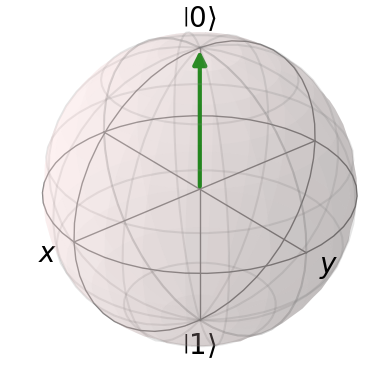

In [53]:
# Apply a π/2 pulse on ion 1 around the +y-axis
rotated_state1 = tensor(qeye(N), rotation_gate_pi_2_pos_y, qeye(2)) * psi0

# Apply free evolution during time tau
tau = t_evolution / 2 * scaling_factor
final_state1 = tensor(qeye(N), free_evolution(tau)) * rotated_state1

# Apply a π pulse on both ions around the +y-axis
rotated_state2 = tensor(qeye(N), rotation_gate_pi_pos_y, rotation_gate_pi_pos_y) * final_state1

# Apply the second free evolution during time tau
final_state2 = tensor(qeye(N), free_evolution(tau)) * rotated_state2

# Apply a π/2 pulse on ion 1 around the -y-axis
rotated_state3 = tensor(qeye(N), rotation_gate_pi_2_neg_y, qeye(2)) * final_state2

# Create a figure and axes for the Bloch sphere
fig = pyplot.figure()
ax = fig.add_subplot(azim=-40, elev=30, projection="3d")
sphere = Bloch(axes=ax)

# Define the animation update function
def animate(i):
    if i == 0:
        sphere.clear()
        sphere.add_states(psi0.ptrace(1))
    elif i == 1:
        sphere.clear()
        sphere.add_states(rotated_state1.ptrace(1))
    elif i == 2:
        sphere.clear()
        sphere.add_states(final_state1.ptrace(1))
    elif i == 3:
        sphere.clear()
        sphere.add_states(rotated_state2.ptrace(1))
    elif i == 4:
        sphere.clear()
        sphere.add_states(final_state2.ptrace(1))
    elif i == 5:
        sphere.clear()
        sphere.add_states(rotated_state3.ptrace(1))
    sphere.render()
    return ax

ani = animation.FuncAnimation(fig, animate, frames=5, interval=1000, blit=False, repeat=True)

# Display the animation in the notebook using the JavaScript writer
HTML(ani.to_jshtml())

# Save the animation as a GIF file
#ani.save('bloch_sphere_spin_echo_pi.gif', writer='pillow', fps=2)


<font face="Arial" size="4" color="black">

In QuTiP, qeye is a function that creates an identity  operator (matrix) of a specified dimension. It represents a "do-nothing"  operation or the absence of any operation on the quantum system. qeye(2)  creates a 2x2 identity matrix. In the context of the code, it  represents no operation being applied to a single ion (qubit). It is  used when you want to leave a specific ion unchanged while applying  operations to other ions. qeye(N) creates an  identity matrix of size NxN, where N is the dimension of the Hilbert  space for the motional mode. In the code, it represents no operation  being applied to the motional mode of the ions. To apply a pulse to a specific ion, you need to change the position of the rotation gate in the tensor function. The tensor function is used to create a composite system by taking the tensor product of operators.
For example, let's say you have two ions and you want to apply a pulse to the first ion while leaving the second ion unchanged. You would use:

- tensor(qeye(N), qeye(2), rotation_gate)

</font>

<font face="Arial" size="4" color="black">

Now, rotation_gate is applied to the second ion, and qeye(2) represents no operation being applied to the first ion. The qeye(N) remains in the first position of the tensor function, indicating that no operation is applied to the motional mode of the ions. By changing the position of the rotation gate, and qeye(2) in the tensor function, you can control which ion the pulse is applied to while leaving the other ion unchanged.

</font>

<font face="Arial" size="4" color="black">

Applying the π-pulse to both ions effectively reverses the direction of precession during the second free evolution period, causing the spin to return to its initial state. This is known as the "spin echo" effect. Applying the π-pulse only to the first ion does not reverse the direction of precession. The spin continues to precess in the same direction during the second free evolution period, resulting in the final state being different from the initial state.
After applying this spin echo sequence, you can measure the states of the ions. If there is coupling between the ions, you should observe that the spins of both ions return to their initial states (ground state |g>) at the end of the sequence. If the ions are not coupled, the spins may not return to their initial states, indicating a lack of interaction between them. By comparing the final states of the ions with their initial states, you can determine if there is coupling present. If the ions return to their initial states, it suggests that there is coupling between them, which is necessary for performing the CNOT gate and creating entanglement.


</font>

In [55]:
from qutip.ipynbtools import version_table

version_table()